In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import pickle, dill
import cv2
from tqdm import tqdm
from time import perf_counter
from ColorHistogram import ColorHistogram

In [2]:
path = "../../../dataset/train/"
path_val = "../../../dataset/valid/"
path_test = "../../../dataset/test/"

train_images_path = list(Path(path).rglob(f"*.jpg"))
val_images_path = list(Path(path_val).rglob(f"*.jpg"))
test_images_path = list(Path(path_test).rglob(f"*.jpg"))

In [3]:
color_model = ColorHistogram()

In [4]:
train_hist, labels, train_paths = color_model.create_train_descriptors(path, "jpg", "./color")  

Extracting Color Histogram from image ..\..\..\dataset\train\unsavory\5610.jpg...: 100%|██████████| 11220/11220 [00:45<00:00, 247.13it/s]


SVC fitted in: 25.777526900000005
KNN fitted in: 0.030305699999999547
Random Forest fitted in: 5.762087100000002


              precision    recall  f1-score   support

      savory       0.87      0.88      0.88      5610
    unsavory       0.88      0.87      0.87      5610

    accuracy                           0.88     11220
   macro avg       0.88      0.88      0.88     11220
weighted avg       0.88      0.88      0.88     11220



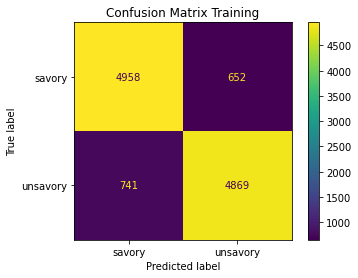

In [5]:
print(classification_report(labels, color_model.model.predict(train_hist)))

ConfusionMatrixDisplay.from_estimator(color_model.model, train_hist, labels)
plt.title("Confusion Matrix Training")
plt.show()

              precision    recall  f1-score   support

      savory       0.88      0.87      0.87      5610
    unsavory       0.87      0.88      0.87      5610

    accuracy                           0.87     11220
   macro avg       0.87      0.87      0.87     11220
weighted avg       0.87      0.87      0.87     11220



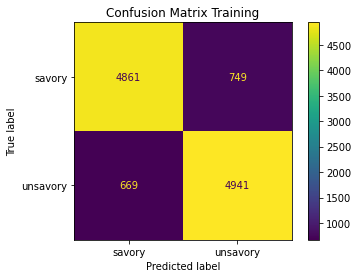

In [6]:
print(classification_report(labels, color_model.knn.predict(train_hist)))

ConfusionMatrixDisplay.from_estimator(color_model.knn, train_hist, labels)
plt.title("Confusion Matrix Training")
plt.show()

              precision    recall  f1-score   support

      savory       1.00      1.00      1.00      5610
    unsavory       1.00      1.00      1.00      5610

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



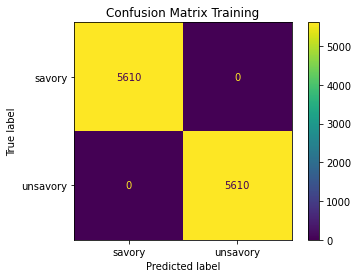

In [7]:
print(classification_report(labels, color_model.forest.predict(train_hist)))

ConfusionMatrixDisplay.from_estimator(color_model.forest, train_hist, labels)
plt.title("Confusion Matrix Training")
plt.show()

## Load after trainig for val phase

In [3]:
color_model = ColorHistogram.load_model('./color/histogram_model.pkl')

Extracting Color Histogram from image ..\..\..\dataset\valid\unsavory\300.jpg...: 100%|██████████| 600/600 [00:02<00:00, 201.68it/s]


              precision    recall  f1-score   support

      savory       0.82      0.78      0.80       300
    unsavory       0.79      0.83      0.81       300

    accuracy                           0.81       600
   macro avg       0.81      0.80      0.80       600
weighted avg       0.81      0.81      0.80       600



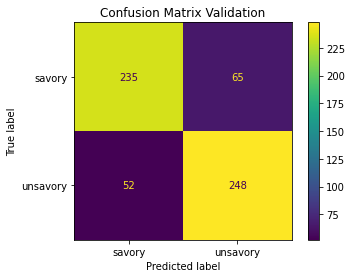

In [11]:
descr_val, labels_val, val_path = color_model.extract_descriptor(path_val, 'jpg')

print(classification_report(labels_val, color_model.model.predict(descr_val)))

ConfusionMatrixDisplay.from_estimator(color_model.model, descr_val, labels_val)
plt.title("Confusion Matrix Validation")
plt.show()

              precision    recall  f1-score   support

      savory       0.80      0.73      0.76       300
    unsavory       0.75      0.82      0.78       300

    accuracy                           0.78       600
   macro avg       0.78      0.77      0.77       600
weighted avg       0.78      0.78      0.77       600



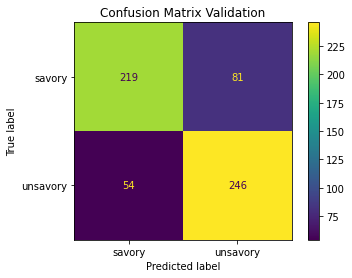

In [10]:
print(classification_report(labels_val, color_model.knn.predict(descr_val)))

ConfusionMatrixDisplay.from_estimator(color_model.knn, descr_val, labels_val)
plt.title("Confusion Matrix Validation")
plt.show()

Val Accuracy: 0.8033333333333333
              precision    recall  f1-score   support

      savory       0.79      0.82      0.81       300
    unsavory       0.81      0.79      0.80       300

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



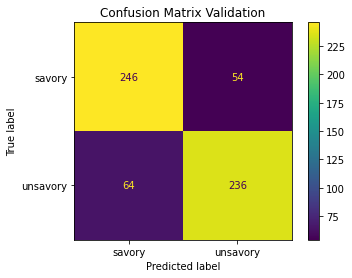

In [9]:
print(classification_report(labels_val, color_model.forest.predict(descr_val)))

ConfusionMatrixDisplay.from_estimator(color_model.forest, descr_val, labels_val)
plt.title("Confusion Matrix Validation")
plt.show()

## Load after training for test phase

In [3]:
color_model = ColorHistogram.load_model('./color/histogram_model.pkl')

Extracting Color Histogram from image ..\..\..\dataset\test\unsavory\300.jpg...: 100%|██████████| 600/600 [00:01<00:00, 315.58it/s]


              precision    recall  f1-score   support

      savory       0.84      0.90      0.87       300
    unsavory       0.90      0.83      0.86       300

    accuracy                           0.86       600
   macro avg       0.87      0.86      0.86       600
weighted avg       0.87      0.86      0.86       600



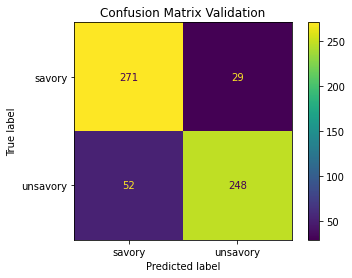

In [12]:
descr_test, labels_test, test_path = color_model.extract_descriptor(path_test, 'jpg')

print(classification_report(labels_test, color_model.model.predict(descr_test)))

ConfusionMatrixDisplay.from_estimator(color_model.model, descr_test, labels_test)
plt.title("Confusion Matrix Validation")
plt.show()

              precision    recall  f1-score   support

      savory       0.78      0.85      0.81       300
    unsavory       0.83      0.77      0.80       300

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



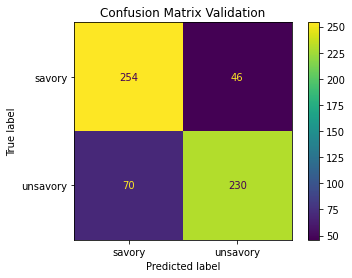

In [13]:
print(classification_report(labels_test, color_model.knn.predict(descr_test)))

ConfusionMatrixDisplay.from_estimator(color_model.knn, descr_test, labels_test)
plt.title("Confusion Matrix Validation")
plt.show()

              precision    recall  f1-score   support

      savory       0.82      0.95      0.88       300
    unsavory       0.94      0.80      0.86       300

    accuracy                           0.87       600
   macro avg       0.88      0.87      0.87       600
weighted avg       0.88      0.87      0.87       600



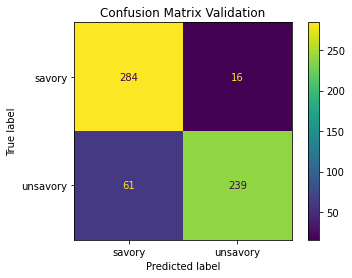

In [14]:
print(classification_report(labels_test, color_model.forest.predict(descr_test)))

ConfusionMatrixDisplay.from_estimator(color_model.forest, descr_test, labels_test)
plt.title("Confusion Matrix Validation")
plt.show()

## CBIR

In [4]:
for p in test_images_path:
    pred, k_similar = ColorHistogram.cbir('./color/histogram_model.pkl', p, './color/train_color_histogram.pkl', './color/train_paths.pkl')
    print(pred)
    print(k_similar)
    break

KDTree computed in: 1.3429862999999997
10 most similar found in: 0.011200399999999888
['savory']
['..\\dataset\\train\\unsavory\\0116.jpg', '..\\dataset\\train\\unsavory\\4357.jpg', '..\\dataset\\train\\savory\\0157.jpg', '..\\dataset\\train\\unsavory\\4579.jpg', '..\\dataset\\train\\savory\\5159.jpg', '..\\dataset\\train\\savory\\3844.jpg', '..\\dataset\\train\\savory\\3679.jpg', '..\\dataset\\train\\unsavory\\5033.jpg', '..\\dataset\\train\\unsavory\\4275.jpg', '..\\dataset\\train\\savory\\0260.jpg']
